In [3]:
import requests
import xmltodict
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def get_currency_range(start="01/08/2023", end="20/08/2023", currency="R01235"):
    base_url = "https://www.cbr.ru/scripts/XML_dynamic.asp"
    params = {
        "date_req1": start,
        "date_req2": end,
        "VAL_NM_RQ": currency
    }

    xml_raw = requests.get(base_url,params=params).text
    return xmltodict.parse(xml_raw)

In [6]:
def get_currency(date="02/03/2002"):
    base_url = "https://www.cbr.ru/scripts/XML_daily.asp"
    params = {
        "date_req": date
    }
    
    xml_raw = requests.get(base_url,params=params).text
    return xmltodict.parse(xml_raw)

In [32]:
def prepare_df(data):
    df = pd.DataFrame(data['ValCurs']['Record'])

    df['date'] = pd.to_datetime(df['@Date'], format="%d.%m.%Y")
    df['Value'] = df['Value'].apply(lambda x: float(x.replace(',', '.')))

    return df

In [8]:
currencies = get_currency(date="10/08/2023")
df_cur = pd.DataFrame(currencies['ValCurs']['Valute'])
df_cur

,@ID,NumCode,CharCode,Nominal,Name,Value
0,R01010,036,AUD,1,Австралийский доллар,"63,8554"
1,R01020A,944,AZN,1,Азербайджанский манат,"57,2941"
2,R01035,826,GBP,1,Фунт стерлингов Соединенного королевства,"123,9122"
3,R01060,051,AMD,100,Армянских драмов,"25,2286"
4,R01090B,933,BYN,1,Белорусский рубль,"30,6405"
5,R01100,975,BGN,1,Болгарский лев,"54,5017"
6,R01115,986,BRL,1,Бразильский реал,"19,7911"
7,R01135,348,HUF,100,Венгерских форинтов,"27,5616"
8,R01150,704,VND,10000,Вьетнамских донгов,"40,8711"
9,R01200,344,HKD,1,Гонконгский доллар,"12,4776"


In [51]:
# Fetch
start = "03/04/2002"
end = "18/08/2023"

dollar_range = get_currency_range(start=start, end=end, currency="R01235")
euro_range = get_currency_range(start=start, end=end, currency="R01239")
jap_range = get_currency_range(start=start, end=end, currency="R01820")
che_frank_range = get_currency_range(start=start, end=end, currency="R01775")

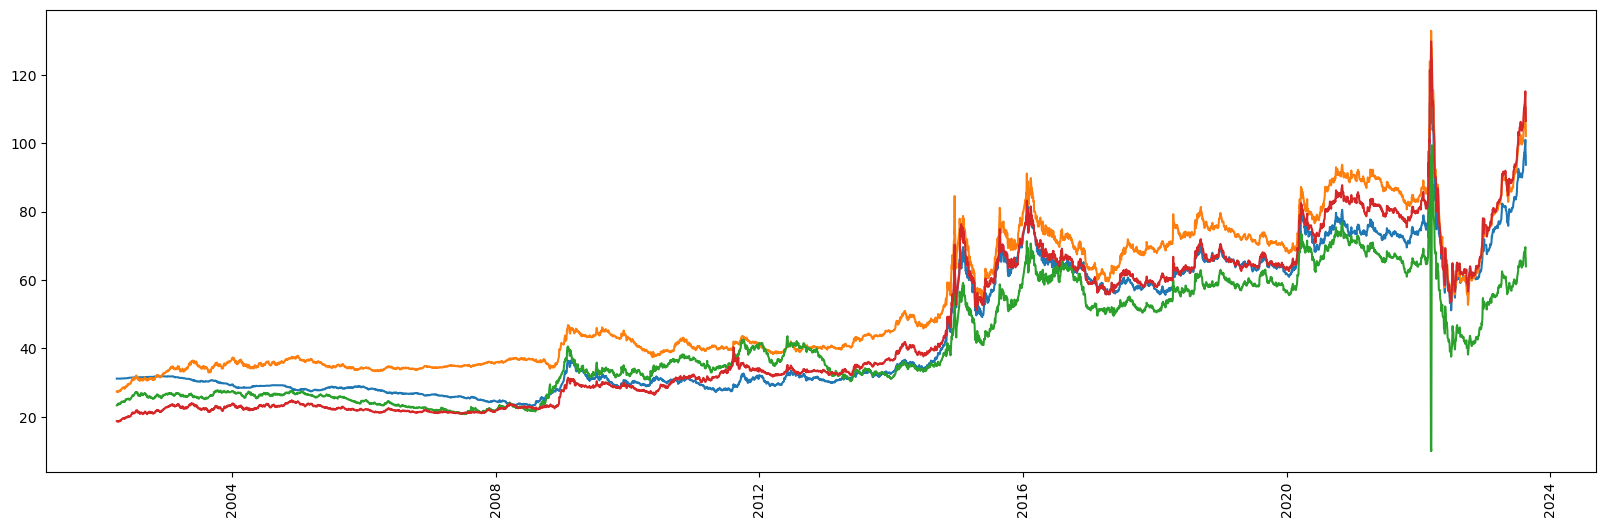

In [52]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

for json_data in [dollar_range, euro_range, jap_range, che_frank_range]:
    df = prepare_df(json_data)

    # Visualize
    X = df['date']
    y = df['Value']
    
    plt.plot(X, y)

In [30]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

In [53]:
df_dollar = prepare_df(dollar_range)
df_euro = prepare_df(euro_range)
df_jap = prepare_df(jap_range)
df_che_frank = prepare_df(che_frank_range)

In [54]:
y1 = df_euro['Value']
y2 = df_dollar['Value']
y3 = df_jap['Value']
y4 = df_che_frank['Value']

In [55]:
print(pearsonr(y1, y2))
print(pearsonr(y1, y3))
print(pearsonr(y2, y3))
print(pearsonr(y1, y4))

print("\n")

print(spearmanr(y1, y2))
print(spearmanr(y1, y3))
print(spearmanr(y2, y3))

PearsonRResult(statistic=0.982247442708195, pvalue=0.0)
PearsonRResult(statistic=0.9573710485654522, pvalue=0.0)
PearsonRResult(statistic=0.9430557651710905, pvalue=0.0)
PearsonRResult(statistic=0.9900913796084087, pvalue=0.0)


SpearmanrResult(correlation=0.8917175300961708, pvalue=0.0)
SpearmanrResult(correlation=0.9334021311960349, pvalue=0.0)
SpearmanrResult(correlation=0.9210614137519, pvalue=0.0)
